## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:

!pip install phik 
!pip install shap
!pip install --upgrade scikit-learn -q


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import phik
import seaborn as sns
import shap

from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
                        
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
                                  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', decimal = ',', sep =';')

In [4]:
def display_dataset_info(data):

    print("–ü–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:")
    display(data.head())
    print("\n")
    
    print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: {data.shape[0]}, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: {data.shape[1]}")
    print("\n")
    

    print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
    data.info()
    print("\n")
    
    print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
    print(data.isnull().sum())
    print("\n")
    
    print("–î—É–±–ª–∏–∫–∞—Ç—ã:") 
    print(data.duplicated().sum())
    print("\n")

    



In [5]:
display_dataset_info(market_file)

–ü–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


id –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞ –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   

   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   

   –ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  –°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2



–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: 1300, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: 13


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1300 non-null   object 
 2   –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞                          1300 non-null   object 
 3   –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å                   1300 non-null   object 
 4   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å                   1300 non-null   float64
 5   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å                 1300 non-null   int64  
 6   –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å                         1300 non-null   int64  
 7   –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏         

In [6]:
display_dataset_info(market_money)

–ü–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


id               –ü–µ—Ä–∏–æ–¥  –í—ã—Ä—É—á–∫–∞
0  215348  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü     0.00
1  215348        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 3,293.10
2  215348     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü     0.00
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 4,472.00
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 4,971.60



–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: 3900, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: 3


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   –ü–µ—Ä–∏–æ–¥   3900 non-null   object 
 2   –í—ã—Ä—É—á–∫–∞  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
id         0
–ü–µ—Ä–∏–æ–¥     0
–í—ã—Ä—É—á–∫–∞    0
dtype: int64


–î—É–±–ª–∏–∫–∞—Ç—ã:
0




In [7]:
display_dataset_info(market_time)

–ü–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


id            –ü–µ—Ä–∏–æ–¥  –º–∏–Ω—É—Ç
0  215348     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     14
1  215348  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     13
2  215349     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     10
3  215349  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     12
4  215350     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13



–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: 2600, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: 3


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   –ü–µ—Ä–∏–æ–¥  2600 non-null   object
 2   –º–∏–Ω—É—Ç   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
id        0
–ü–µ—Ä–∏–æ–¥    0
–º–∏–Ω—É—Ç     0
dtype: int64


–î—É–±–ª–∏–∫–∞—Ç—ã:
0




In [8]:
display_dataset_info(money)

–ü–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


id  –ü—Ä–∏–±—ã–ª—å
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21



–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: 1300, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤: 2


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   –ü—Ä–∏–±—ã–ª—å  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
id         0
–ü—Ä–∏–±—ã–ª—å    0
dtype: int64


–î—É–±–ª–∏–∫–∞—Ç—ã:
0




##### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

–ó–∞–≥—Ä—É–∑–∏–ª–∏ –∏ –ø–µ—Ä–≤–∏—á–Ω–æ –æ—Å–º–æ—Ç—Ä–µ–ª–∏ –¥–∞—Ç–∞—Å–µ—Ç—ã. 
* market_file: 1300 —Å—Ç—Ä–æ–∫, 13 —Å—Ç–æ–ª–±—Ü–æ–≤. –ù–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –Ω—É–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ, —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ—Ç.
* market_money: 3900 —Å—Ç—Ä–æ–∫, 3 —Å—Ç–æ–ª–±—Ü–∞. –ù–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤,  –Ω—É–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ, –µ—Å—Ç—å —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã.
* market_time: 2600 —Å—Ç—Ä–æ–∫, 3 —Å—Ç–æ–ª–±—Ü–∞. –ù–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤,  –Ω—É–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ, —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ—Ç.
* money: 1300 —Å—Ç—Ä–æ–∫, 2 —Å—Ç–æ–ª–±—Ü–∞. –ù–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤,  –Ω—É–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ, —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ—Ç.



## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [9]:
market_file.head(10)

id –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞ –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
5  215353                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
6  215354                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
7  215355                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
8  215356                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
9  215357                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   

   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   
5                3.30                     4           762               0.26   
6                5.10                     3           431               0.23   
7                4.70                     4           284               0.17   
8                4.20                     4           192               0.14   
9                3.90                     5           154               0.00   

             –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   
5               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    4   
6           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
7                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
8           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
9  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è                                    3   

   –ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  –°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

In [10]:
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')

In [11]:
print(market_file['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'].unique())
print(market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'].unique())
print(market_file['—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å'].unique())
print(market_file['–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è'].unique())

['–°–Ω–∏–∑–∏–ª–∞—Å—å' '–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å']
['–ø—Ä–µ–º–∏—É–º' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç']
['–¥–∞' '–Ω–µ—Ç']
['–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π' '–î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å' '–ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã'
 '–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è' '–ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞'
 '–ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞']


In [12]:
market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'] = market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'].replace(['—Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç'],'—Å—Ç–∞–Ω–¥–∞—Ä—Ç')
print(market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'].unique())

['–ø—Ä–µ–º–∏—É–º' '—Å—Ç–∞–Ω–¥–∞—Ä—Ç']


In [13]:
market_money.head(10)

id               –ü–µ—Ä–∏–æ–¥  –í—ã—Ä—É—á–∫–∞
0  215348  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü     0.00
1  215348        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 3,293.10
2  215348     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü     0.00
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 4,472.00
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 4,971.60
5  215349     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 5,216.00
6  215350  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 4,826.00
7  215350        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 5,058.40
8  215350     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 5,457.50
9  215351        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 6,610.40

In [14]:
market_money.columns = map(str.lower, market_money.columns)

In [15]:
print(market_money['–ø–µ—Ä–∏–æ–¥'].unique())

['–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü' '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü']


In [16]:
market_money.duplicated().sum()

0

In [17]:
market_money = market_money.drop_duplicates(keep='first')

In [18]:
market_money.duplicated().sum()

0

In [19]:
market_time.head(10)

id            –ü–µ—Ä–∏–æ–¥  –º–∏–Ω—É—Ç
0  215348     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     14
1  215348  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     13
2  215349     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     10
3  215349  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     12
4  215350     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
5  215350  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8
6  215351     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
7  215351  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     11
8  215352     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     11
9  215352  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8

In [20]:
market_time.columns = map(str.lower, market_time.columns)

In [21]:
print(market_time['–ø–µ—Ä–∏–æ–¥'].unique())

['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü']


In [22]:
market_time['–ø–µ—Ä–∏–æ–¥'] = market_time['–ø–µ—Ä–∏–æ–¥'].replace(['–ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü'],'–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü')
print(market_time['–ø–µ—Ä–∏–æ–¥'].unique())

['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü']


In [23]:
money.head(10)

id  –ü—Ä–∏–±—ã–ª—å
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

In [24]:
money.columns = map(str.lower, money.columns)

In [25]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º —Ä–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
print(f'–î–∞—Ç–∞—Å–µ—Ç market_file:{market_file.shape}')
print(f'–î–∞—Ç–∞—Å–µ—Ç market_money:{market_money.shape}')
print(f'–î–∞—Ç–∞—Ñ—Ä–µ–π–º market_time:{market_time.shape}')
print(f'–î–∞—Ç–∞—Ñ—Ä–µ–π–º money:{money.shape}')

–î–∞—Ç–∞—Å–µ—Ç market_file:(1300, 13)
–î–∞—Ç–∞—Å–µ—Ç market_money:(3900, 3)
–î–∞—Ç–∞—Ñ—Ä–µ–π–º market_time:(2600, 3)
–î–∞—Ç–∞—Ñ—Ä–µ–π–º money:(1300, 2)


–í—Å–µ –≤ –ø–æ—Ä—è–¥–∫–µ, –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –º–µ—Å—Ç–µ

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

* –ü—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã
* –Ø–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_money –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ 5, –æ–Ω–∏ –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã.
* –°–¥–µ–ª–∞–ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤: –Ω–∞–∑–≤–∞–Ω–∏—è –ø–µ—Ä–µ–≤–µ–¥–µ–Ω—ã –≤ —Å—Ç—Ä–æ—á–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç, –ø—Ä–æ–±–µ–ª—ã –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_file –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω–∏–∂–Ω–µ–µ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏–µ. 
* –ë—ã–ª–∏ –Ω–∞–π–¥–µ–Ω—ã —Ç–∞–∫–∂–µ –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_file, –æ–Ω–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã
* –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∞ –æ–ø–µ—á–∞—Ç–∫–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_time 
* –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ money –∏–∑–º–µ–Ω–∏–ª–∏ —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –Ω–∞ float, –Ω–æ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏—à–ª–æ—Å—å –ø–æ–º–µ–Ω—è—Ç—å —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª–∏ –¥–µ—Å—è—Ç–∏—á–Ω—ã–µ –Ω–∞ —Ç–æ—á–∫–∏


## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º market_file

In [26]:
market_file.describe()

id  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
count   1,300.00            1,300.00              1,300.00      1,300.00   
mean  215,997.50                4.25                  4.01        601.90   
std       375.42                1.01                  0.70        249.86   
min   215,348.00                0.90                  3.00        110.00   
25%   215,672.75                3.70                  4.00        405.50   
50%   215,997.50                4.20                  4.00        606.00   
75%   216,322.25                4.90                  4.00        806.00   
max   216,647.00                6.60                  5.00      1,079.00   

       –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
count           1,300.00                             1,300.00   
mean                0.32                                 3.27   
std                 0.25                                 1.36   
min                 0.00                                 1.00   
25%                 0.17                                 2.00   
50%                 0.24                                 3.00   
75%                 0.30                                 4.00   
max                 0.99                                 6.00   

       –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
count                            1,300.00        1,300.00          1,300.00  
mean                                 2.84            4.19              8.18  
std                                  1.97            1.96              3.98  
min                                  0.00            0.00              1.00  
25%                                  1.00            3.00              5.00  
50%                                  3.00            4.00              8.00  
75%                                  4.00            6.00             11.00  
max                                 10.00            9.00             20.00

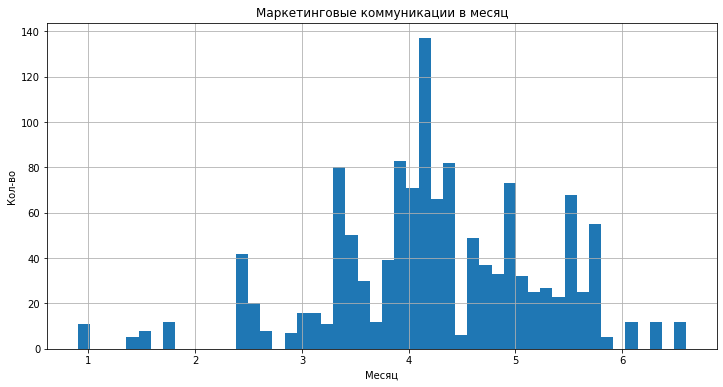

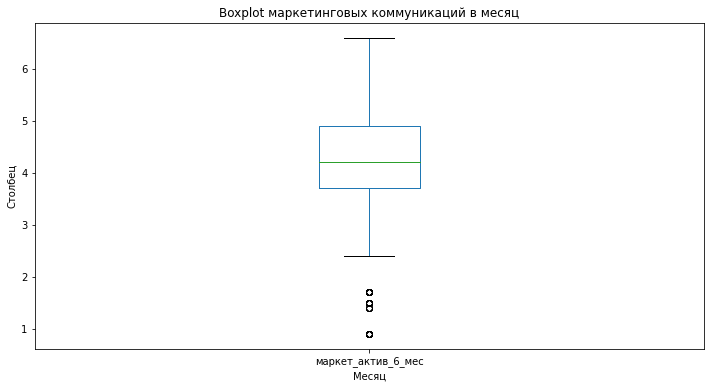

In [27]:
(market_file['–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å']
    .plot(kind='hist', bins=50, grid=True, figsize=(12, 6))
)
plt.title('–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏ –≤ –º–µ—Å—è—Ü')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ö–æ–ª-–≤–æ')
plt.show()

(market_file['–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('Boxplot –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–π –≤ –º–µ—Å—è—Ü')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü')
plt.show()

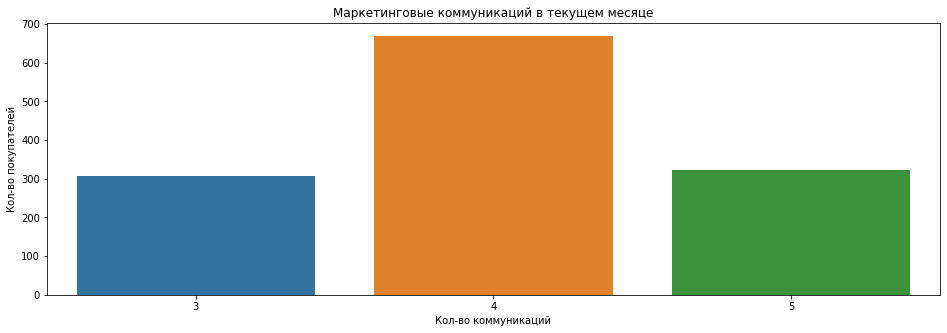

In [28]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å', data =  market_file)
plt.title('–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–µ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–π –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ')
plt.xlabel('–ö–æ–ª-–≤–æ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–π')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()
plt.show();

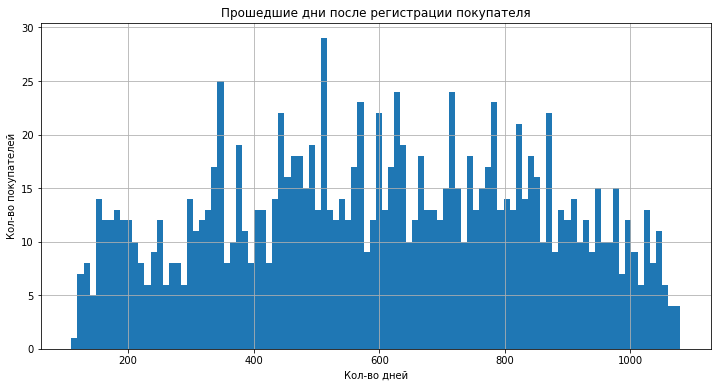

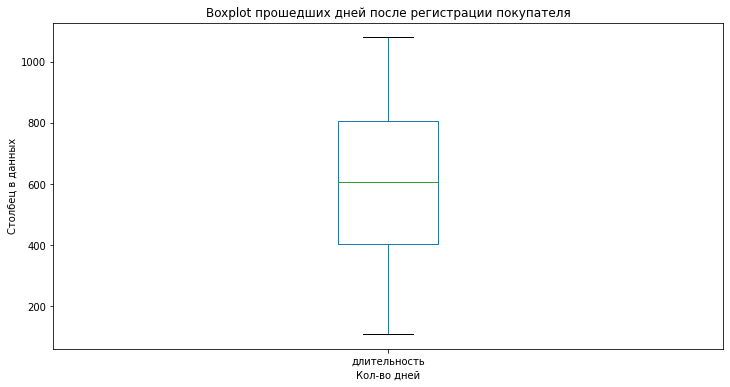

In [29]:
(market_file['–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6))
)
plt.title('–ü—Ä–æ—à–µ–¥—à–∏–µ –¥–Ω–∏ –ø–æ—Å–ª–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—è')
plt.xlabel('–ö–æ–ª-–≤–æ –¥–Ω–µ–π')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

(market_file['–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('Boxplot –ø—Ä–æ—à–µ–¥—à–∏—Ö –¥–Ω–µ–π –ø–æ—Å–ª–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—è')
plt.xlabel('–ö–æ–ª-–≤–æ –¥–Ω–µ–π')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.show()

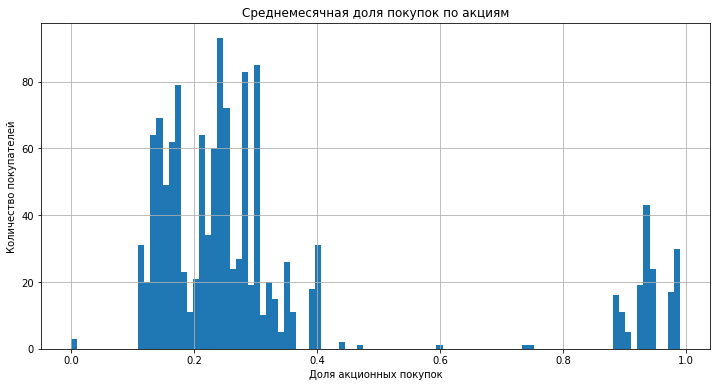

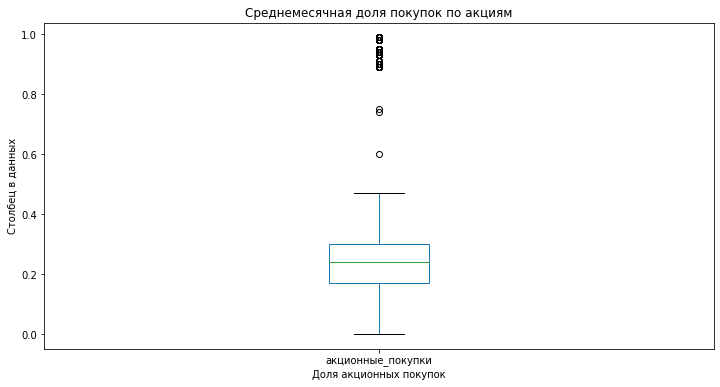

In [30]:
(market_file['–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6))
)
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–∞—è –¥–æ–ª—è –ø–æ–∫—É–ø–æ–∫ –ø–æ –∞–∫—Ü–∏—è–º')
plt.xlabel('–î–æ–ª—è –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

(market_file['–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–∞—è –¥–æ–ª—è –ø–æ–∫—É–ø–æ–∫ –ø–æ –∞–∫—Ü–∏—è–º')
plt.xlabel('–î–æ–ª—è –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.show()

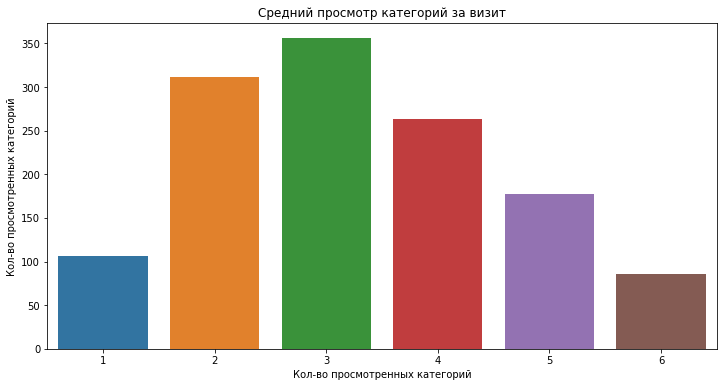

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç', data =  market_file)
plt.title('–°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Å–º–æ—Ç—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∑–∞ –≤–∏–∑–∏—Ç')
plt.xlabel('–ö–æ–ª-–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
plt.ylabel('–ö–æ–ª-–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
plt.show()
plt.show();

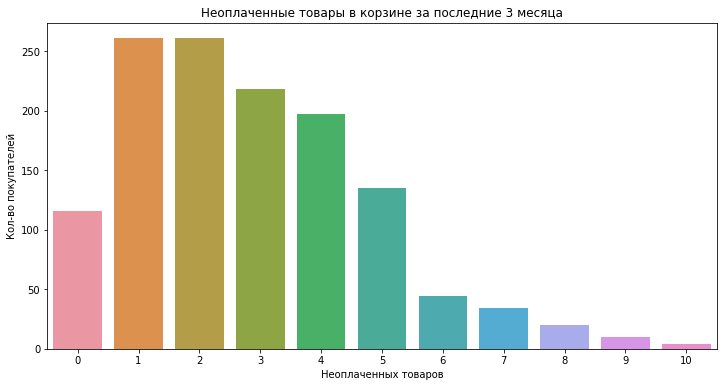

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª', data =  market_file)
plt.title('–ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã –≤ –∫–æ—Ä–∑–∏–Ω–µ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 3 –º–µ—Å—è—Ü–∞')
plt.xlabel('–ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()
plt.show();

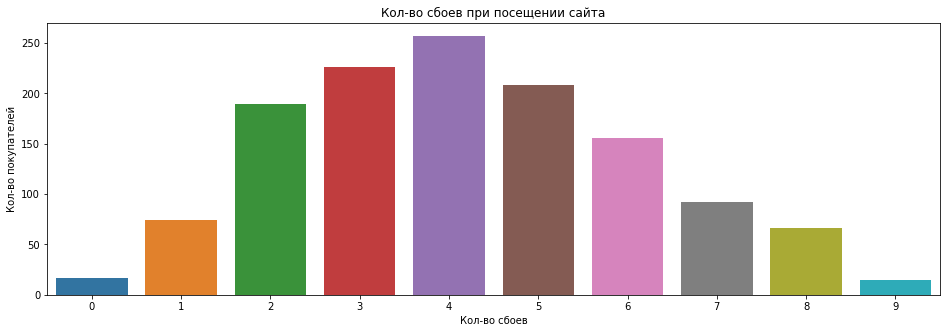

In [33]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞', data =  market_file)
plt.title('–ö–æ–ª-–≤–æ —Å–±–æ–µ–≤ –ø—Ä–∏ –ø–æ—Å–µ—â–µ–Ω–∏–∏ —Å–∞–π—Ç–∞')
plt.xlabel('–ö–æ–ª-–≤–æ —Å–±–æ–µ–≤')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()
plt.show();

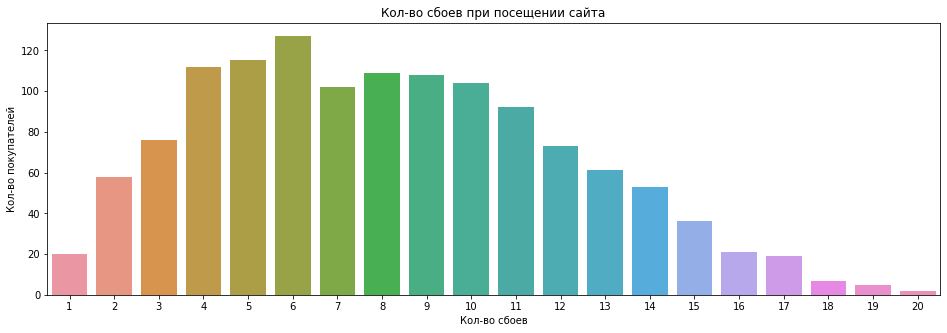

In [34]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç', data =  market_file)
plt.title('–ö–æ–ª-–≤–æ —Å–±–æ–µ–≤ –ø—Ä–∏ –ø–æ—Å–µ—â–µ–Ω–∏–∏ —Å–∞–π—Ç–∞')
plt.xlabel('–ö–æ–ª-–≤–æ —Å–±–æ–µ–≤')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()
plt.show();

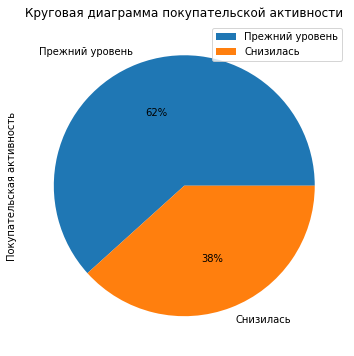

In [35]:
(market_file
    .pivot_table(index='–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='–ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å')
)
plt.title('–ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
plt.show()

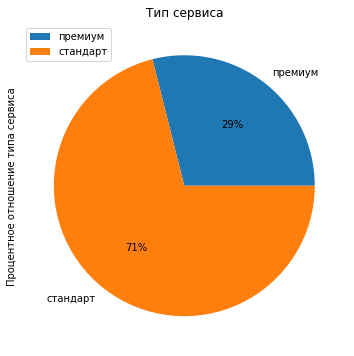

In [36]:
(market_file
    .pivot_table(index='—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ç–∏–ø–∞ —Å–µ—Ä–≤–∏—Å–∞')
)
plt.title('–¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞')
plt.show()

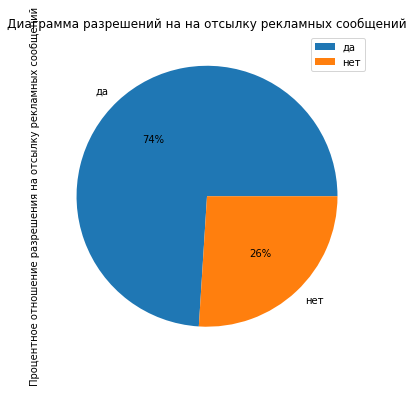

In [37]:
(market_file
    .pivot_table(index='—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –Ω–∞ –æ—Ç—Å—ã–ª–∫—É —Ä–µ–∫–ª–∞–º–Ω—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏–π')
)
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–π –Ω–∞ –Ω–∞ –æ—Ç—Å—ã–ª–∫—É —Ä–µ–∫–ª–∞–º–Ω—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏–π')
plt.show()

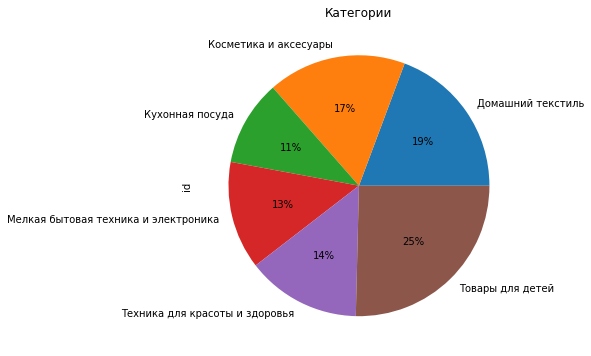

In [38]:
(market_file
    .pivot_table(index='–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6))              
)
plt.title('–ö–∞—Ç–µ–≥–æ—Ä–∏–∏')
plt.legend().remove()
plt.show()

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã–≤–æ–¥ –ø–æ –∞–Ω–∞–ª–∏–∑—É –¥–∞—Ç–∞—Å–µ—Ç–∞ market_file:

* –î–∞–Ω–Ω—ã–µ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ù–µ –Ω–∞–π–¥–µ–Ω–æ –∞–Ω–æ–º–∞–ª–∏–π
* –í –¥–∞–Ω–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã, –∏—Ö –º–æ–∂–Ω–æ —Å–≤—è–∑–∞—Ç—å –∫–∞–∫ —Å –≤–æ–∑–º–æ–∂–Ω—ã–º–∏ –æ—à–∏–±–∫–∞–º–∏, —Ç–∞–∫ –∏ —Å —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –ø—Ä–æ–¥–∞–∂ –∏–ª–∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–º —Ñ–∞–∫—Ç–æ—Ä–æ–º (–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤). 
* –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏–∑–Ω–∞–∫ –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ—Ö–æ–∂ –Ω–∞ –±–∏–º–æ–¥–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —É—á–∏—Ç—ã–≤–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —Ñ–∞–∫—Ç–æ—Ä–∞
* –°–∞–º–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 6 –º–µ—Å—è—Ü–µ–≤ - –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π, –¥–∞–ª–µ–µ –∏–¥–µ—Ç –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å –∏ –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã. –°–∞–º–∞—è –Ω–µ–ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è - –ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞. 
* 74% –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≥–ª–∞—Å–∏–ª–∏—Å—å –Ω–∞ —Ä–µ–∫–ª–∞–º–Ω—É—é —Ä–∞—Å—Å—ã–ª–∫—É
* 71% –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–º–µ—é—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —Ç–∏–ø —Å–µ—Ä–≤–∏—Å–∞
* 62% —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å–Ω—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º market_money

–í—ã–±–∏—Ä–∞–µ–º –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é –Ω–µ –º–µ–Ω–µ–µ —Ç—Ä–µ—Ö –º–µ—Å—è—Ü–µ–≤. 

In [39]:
market_money = market_money[market_money.id.isin(market_money.query('–≤—ã—Ä—É—á–∫–∞==0')['id'].unique())==False] 
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   –ø–µ—Ä–∏–æ–¥   3891 non-null   object 
 2   –≤—ã—Ä—É—á–∫–∞  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


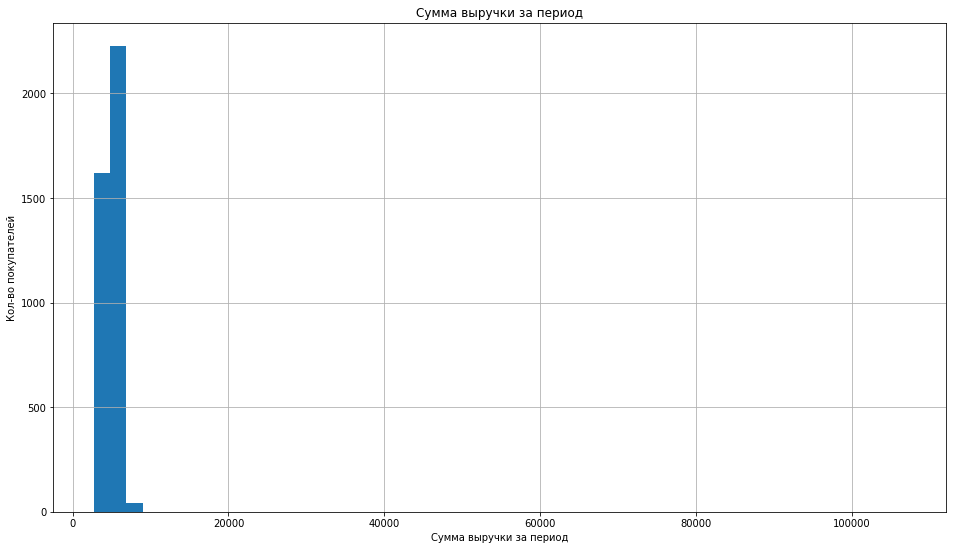

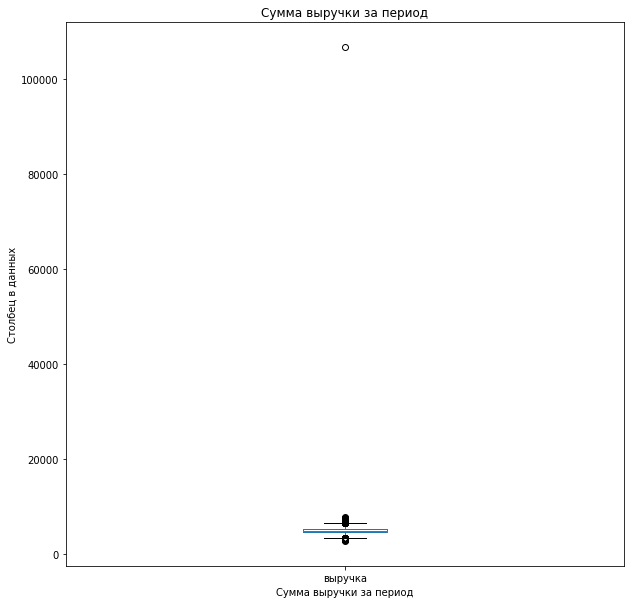

In [40]:
(market_money['–≤—ã—Ä—É—á–∫–∞']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.xlabel('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

(market_money['–≤—ã—Ä—É—á–∫–∞']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.xlabel('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.show()

In [41]:
market_money.sort_values(by='–≤—ã—Ä—É—á–∫–∞', ascending=False).head()

id         –ø–µ—Ä–∏–æ–¥    –≤—ã—Ä—É—á–∫–∞
98    215380  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 106,862.20
435   215493  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   7,799.40
262   215435  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   7,605.30
1481  215841  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   7,557.00
2388  216144  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   7,547.80

–ù–∞—à–ª–∞ –∞–Ω–æ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞ –∏–ª–∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π —Ñ–∞–∫—Ç–æ—Ä. –ê –º–æ–∂–µ—Ç –±—ã—Ç—å –∫–∞–∫–∞—è-—Ç–æ –æ–ø—Ç–æ–≤–∞—è –∑–∞–∫—É–ø–∫–∞. –í –ª—é–±–æ–º —Å–ª—É—á–∞–µ, –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞—á–∏–Ω–∞—è —Å 7 799

In [42]:
market_money = market_money[market_money['–≤—ã—Ä—É—á–∫–∞'] < 8000]

In [43]:
market_money.sort_values(by='–≤—ã—Ä—É—á–∫–∞', ascending=False).head()

id         –ø–µ—Ä–∏–æ–¥  –≤—ã—Ä—É—á–∫–∞
435   215493  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 7,799.40
262   215435  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 7,605.30
1481  215841  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 7,557.00
2388  216144  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 7,547.80
566   215536  —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 7,467.90

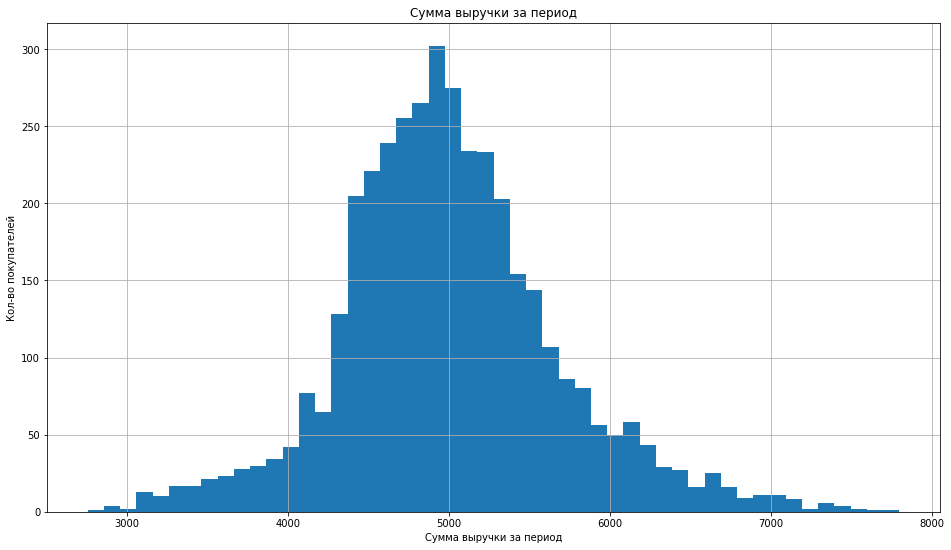

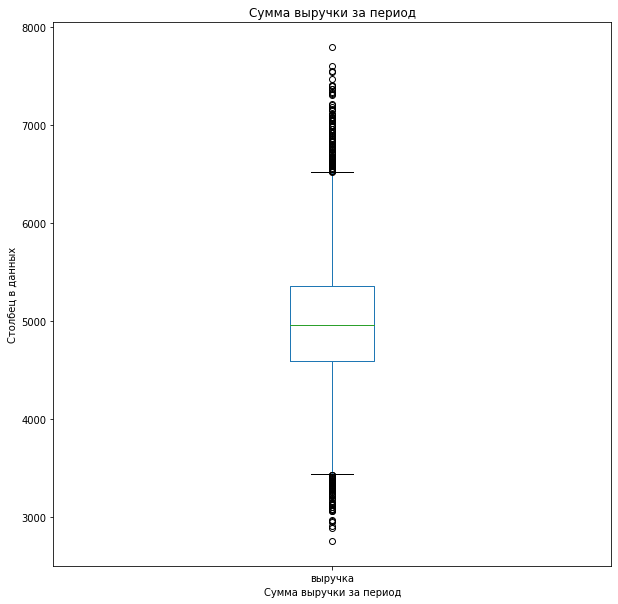

In [44]:
(market_money['–≤—ã—Ä—É—á–∫–∞']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.xlabel('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

(market_money['–≤—ã—Ä—É—á–∫–∞']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.xlabel('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.show()

In [45]:
market_money['–≤—ã—Ä—É—á–∫–∞'].describe()

count   3,890.00
mean    5,007.54
std       679.24
min     2,758.70
25%     4,592.00
50%     4,959.00
75%     5,363.00
max     7,799.40
Name: –≤—ã—Ä—É—á–∫–∞, dtype: float64

In [46]:
market_money['–≤—ã—Ä—É—á–∫–∞'].describe()

count   3,890.00
mean    5,007.54
std       679.24
min     2,758.70
25%     4,592.00
50%     4,959.00
75%     5,363.00
max     7,799.40
Name: –≤—ã—Ä—É—á–∫–∞, dtype: float64

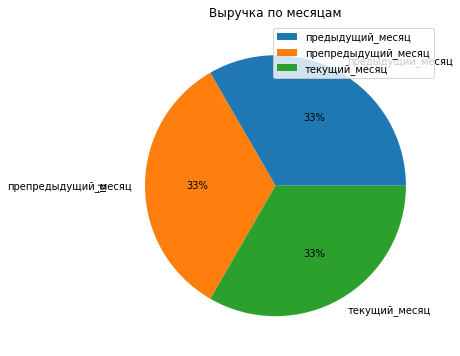

In [47]:
(market_money
    .pivot_table(index='–ø–µ—Ä–∏–æ–¥', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
             )
)
plt.title('–í—ã—Ä—É—á–∫–∞ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.show()

In [48]:
market_money['id'].nunique()

1297

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –∞–Ω–∞–ª–∏–∑—É market_money

* –£–±—Ä–∞–ª–∏ –∞–Ω–æ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ  –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–æ–π –∏–ª–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é –ø–æ–∫—É–ø–∫–∏ (–æ–ø—Ç –∏–ª–∏ –¥—Ä—É–≥–æ–µ). –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –≥—Ä–∞—Ñ–∏–∫ –≤—ã—Ä—É—á–∫–∏ –≤—ã–≥–ª—è–¥–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ. 
* –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–¥–∞–Ω–∏–µ–º –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–ª–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–ª–∞–ª–∏ –ø–æ–∫—É–ø–∫–∏ –≤—Å–µ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞
* —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö id –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ 1297, —Ç–æ –µ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –¥–∞–µ—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ id –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –ø–æ–∫—É–ø–∫–∞–º –∑–∞ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞


–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º market_time –∏ money

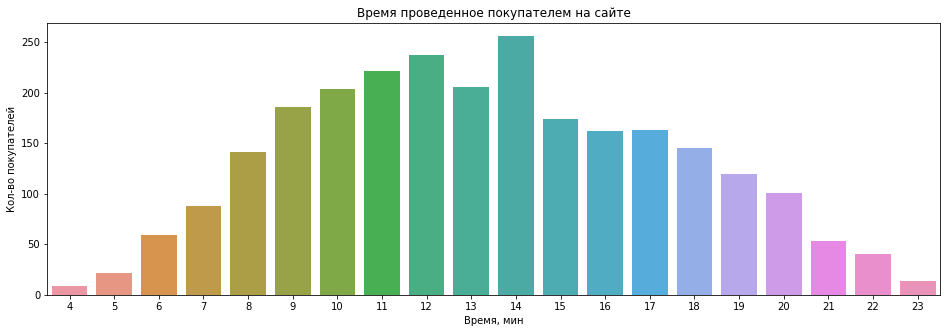

In [49]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = '–º–∏–Ω—É—Ç', data =  market_time)
plt.title('–í—Ä–µ–º—è –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–º –Ω–∞ —Å–∞–π—Ç–µ')
plt.xlabel('–í—Ä–µ–º—è, –º–∏–Ω')
plt.ylabel('–ö–æ–ª-–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()
plt.show();

In [50]:
market_time['–º–∏–Ω—É—Ç'].describe()

count   2,600.00
mean       13.34
std         4.08
min         4.00
25%        10.00
50%        13.00
75%        16.00
max        23.00
Name: –º–∏–Ω—É—Ç, dtype: float64

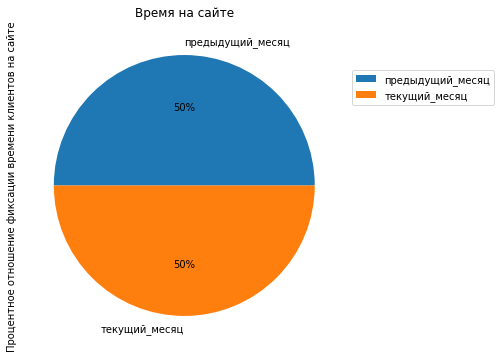

In [51]:
(market_time
    .pivot_table(index='–ø–µ—Ä–∏–æ–¥', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ñ–∏–∫—Å–∞—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞ —Å–∞–π—Ç–µ')
)
plt.title('–í—Ä–µ–º—è –Ω–∞ —Å–∞–π—Ç–µ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

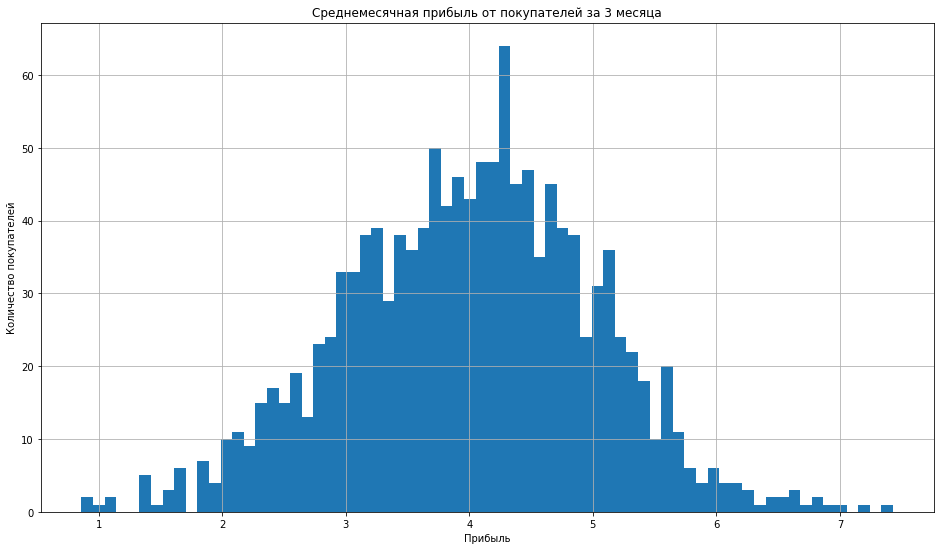

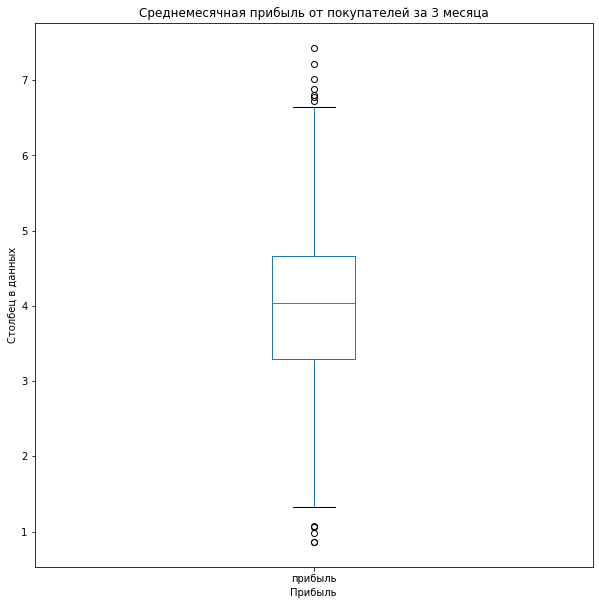

In [52]:
(money['–ø—Ä–∏–±—ã–ª—å']
    .plot(kind='hist', bins=70, grid=True, figsize=(16, 9))
)
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –æ—Ç –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –∑–∞ 3 –º–µ—Å—è—Ü–∞')
plt.xlabel('–ü—Ä–∏–±—ã–ª—å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

(money['–ø—Ä–∏–±—ã–ª—å']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –æ—Ç –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –∑–∞ 3 –º–µ—Å—è—Ü–∞')
plt.xlabel('–ü—Ä–∏–±—ã–ª—å')
plt.ylabel('–°—Ç–æ–ª–±–µ—Ü –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.show()

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é –¥–∞–Ω–Ω—ã—Ö:

* –î–∞–Ω–Ω—ã–µ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
* –í –¥–∞–Ω–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã, –∏—Ö –º–æ–∂–Ω–æ —Å–≤—è–∑–∞—Ç—å –∫–∞–∫ —Å –≤–æ–∑–º–æ–∂–Ω—ã–º–∏ –æ—à–∏–±–∫–∞–º–∏, —Ç–∞–∫ –∏ —Å —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –ø—Ä–æ–¥–∞–∂ –∏–ª–∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–º —Ñ–∞–∫—Ç–æ—Ä–æ–º (–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤).
* –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏–∑–Ω–∞–∫ –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ—Ö–æ–∂ –Ω–∞ –±–∏–º–æ–¥–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —É—á–∏—Ç—ã–≤–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —Ñ–∞–∫—Ç–æ—Ä–∞
* –í market_money —É–±—Ä–∞–ª–∏ –∞–Ω–æ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–æ–π –∏–ª–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é –ø–æ–∫—É–ø–∫–∏ (–æ–ø—Ç –∏–ª–∏ –¥—Ä—É–≥–æ–µ). –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –≥—Ä–∞—Ñ–∏–∫ –≤—ã—Ä—É—á–∫–∏ –≤—ã–≥–ª—è–¥–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ.
* –°–∞–º–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 6 –º–µ—Å—è—Ü–µ–≤ - –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π, –¥–∞–ª–µ–µ –∏–¥–µ—Ç –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å –∏ –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã. –°–∞–º–∞—è –Ω–µ–ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è - –ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞.
* 74% –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≥–ª–∞—Å–∏–ª–∏—Å—å –Ω–∞ —Ä–µ–∫–ª–∞–º–Ω—É—é —Ä–∞—Å—Å—ã–ª–∫—É
* 71% –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–º–µ—é—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —Ç–∏–ø —Å–µ—Ä–≤–∏—Å–∞
* 62% —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å–Ω—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å
* –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–¥–∞–Ω–∏–µ–º –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–ª–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–ª–∞–ª–∏ –ø–æ–∫—É–ø–∫–∏ –≤—Å–µ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞
* —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö id –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ 1297, —Ç–æ –µ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –¥–∞–µ—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ id –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –ø–æ–∫—É–ø–∫–∞–º –∑–∞ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞
* –î–∞—Ç–∞—Å–µ—Ç money —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ–± —É—Å–ª–æ–≤–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è—Ö –ø—Ä–∏–±—ã–ª–∏ —Å –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã, –Ω–µ—Ç –≤—ã–±—Ä–æ—Å–æ–≤, –Ω–µ—Ç –∞–Ω–æ–º–∞–ª–∏–π.

<font color='blue'><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ : </b></font> ‚úîÔ∏è\
<font color='green'>–•–æ—Ä–æ—à–∞—è —Ä–∞–±–æ—Ç–∞ –≤ —á–∞—Å—Ç–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö: –º–æ–ª–æ–¥–µ—Ü, —á—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—à—å —Ñ—É–Ω–∫—Ü–∏–∏, –∞ —Ç–∞–∫–∂–µ –ø—Ä–∏–º–µ–Ω—è–µ—à—å –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –¥–ª—è —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã.</font>

 ## –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü

In [53]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1300 non-null   object 
 2   —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞                          1300 non-null   object 
 3   —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å                   1300 non-null   object 
 4   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å                   1300 non-null   float64
 5   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å                 1300 non-null   int64  
 6   –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å                         1300 non-null   int64  
 7   –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏                    1300 non-null   float64
 8   –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è                 1300 non-null   object 
 9   —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–

In [54]:
market_file.head()

id –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   

   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   

   –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [55]:
display(market_money.head())
market_money.info()

id               –ø–µ—Ä–∏–æ–¥  –≤—ã—Ä—É—á–∫–∞
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 4,472.00
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 4,971.60
5  215349     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 5,216.00
6  215350  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü 4,826.00
7  215350        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü 5,058.40

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3890 non-null   int64  
 1   –ø–µ—Ä–∏–æ–¥   3890 non-null   object 
 2   –≤—ã—Ä—É—á–∫–∞  3890 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [56]:
market_money = market_money.pivot_table(index='id', columns='–ø–µ—Ä–∏–æ–¥', values='–≤—ã—Ä—É—á–∫–∞')
market_money.columns = ['–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü']
market_money.head()

–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  \
id                                                           
215349               5,216.00                     4,472.00   
215350               5,457.50                     4,826.00   
215351               6,158.00                     4,793.00   
215352               5,807.50                     4,594.00   
215353               4,738.50                     5,124.00   

        –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  
id                                
215349                  4,971.60  
215350                  5,058.40  
215351                  6,610.40  
215352                  5,872.50  
215353                  5,388.50

In [57]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü        1297 non-null   float64
 1   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  1297 non-null   float64
 2   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü     1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


In [58]:
market_money.isna().sum()

–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü          0
–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü    0
–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü       1
dtype: int64

In [59]:
market_money = market_money.dropna()

In [60]:
market_time = market_time.pivot_table(index='id', columns='–ø–µ—Ä–∏–æ–¥', values='–º–∏–Ω—É—Ç')
market_time.columns = ['–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü']
print(market_time.head())

        –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11


In [61]:
market_time.isna().sum()

–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü    0
–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü       0
dtype: int64

In [62]:
data_market = pd.merge(market_money, pd.merge(market_time, market_file, on='id', sort=True), on='id', sort=True)
print(data_market.info())
data_market.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                1296 non-null   float64
 2   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü          1296 non-null   float64
 3   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü             1296 non-null   float64
 4   –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü               1296 non-null   int64  
 5   –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                  1296 non-null   int64  
 6   –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1296 non-null   object 
 7   —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞                          1296 non-null   object 
 8   —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å                   1296 non-null   object 
 9   –º–∞—Ä–∫

id  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  \
0  215349               5,216.00                     4,472.00   
1  215350               5,457.50                     4,826.00   
2  215351               6,158.00                     4,793.00   
3  215352               5,807.50                     4,594.00   
4  215353               4,738.50                     5,124.00   

   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü  \
0                  4,971.60                      12                   10   
1                  5,058.40                       8                   13   
2                  6,610.40                      11                   13   
3                  5,872.50                       8                   11   
4                  5,388.50                      10                   10   

  –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  \
0                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
2                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
3                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
4                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   

   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                4.40                     4           819               0.75   
1                4.90                     3           539               0.14   
2                3.20                     5           896               0.99   
3                5.10                     3          1064               0.94   
4                3.30                     4           762               0.26   

  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
1    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
2     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
3     –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   
4    –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    4   

   –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   4               2                 5  
1                                   2               1                 5  
2                                   0               6                 4  
3                                   2               3                 2  
4                                   1               1                 4

In [63]:
data_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                1296 non-null   float64
 2   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü          1296 non-null   float64
 3   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü             1296 non-null   float64
 4   –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü               1296 non-null   int64  
 5   –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                  1296 non-null   int64  
 6   –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1296 non-null   object 
 7   —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞                          1296 non-null   object 
 8   —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å                   1296 non-null   object 
 9   –º–∞—Ä–∫

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

–î–∞–Ω–Ω—ã–µ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –æ–±—ä–µ–¥–∏–Ω–∏–ª–∏ –≤ –æ–¥–∏–Ω - data_market

–∏–∑ —Å—Ç–æ–ª–±—Ü–∞ –≤—ã—Ä—É—á–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ market_money —Å–¥–µ–ª–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã: '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü'

–∏–∑ —Å—Ç–æ–ª–±—Ü–∞ –º–∏–Ω—É—Ç –¥–∞—Ç–∞—Å–µ—Ç–∞ market_time  —Å–¥–µ–ª–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã: '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü'


 ## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [64]:
data_market = data_market.sort_values(by=['id']).set_index('id')

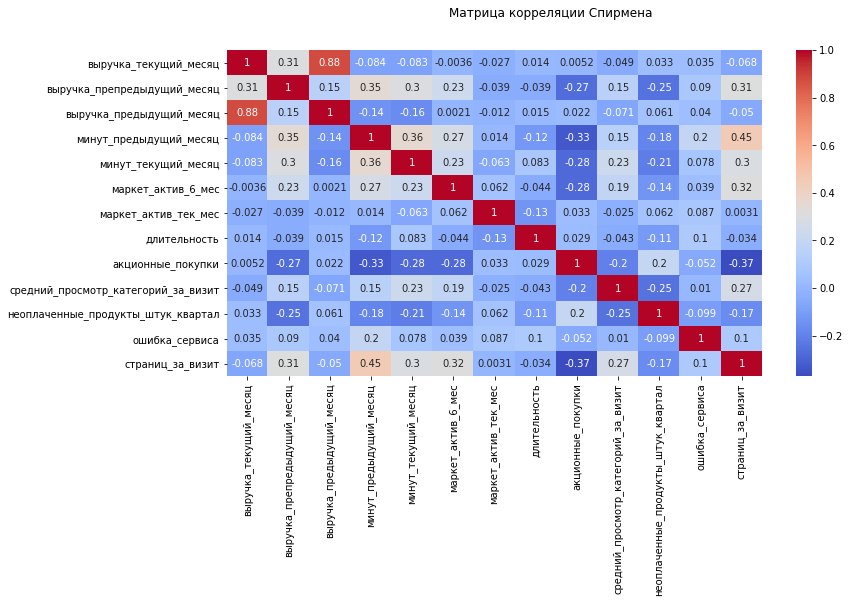

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞')
sns.heatmap(data_market.corr(method="spearman"), annot=True, cmap='coolwarm');

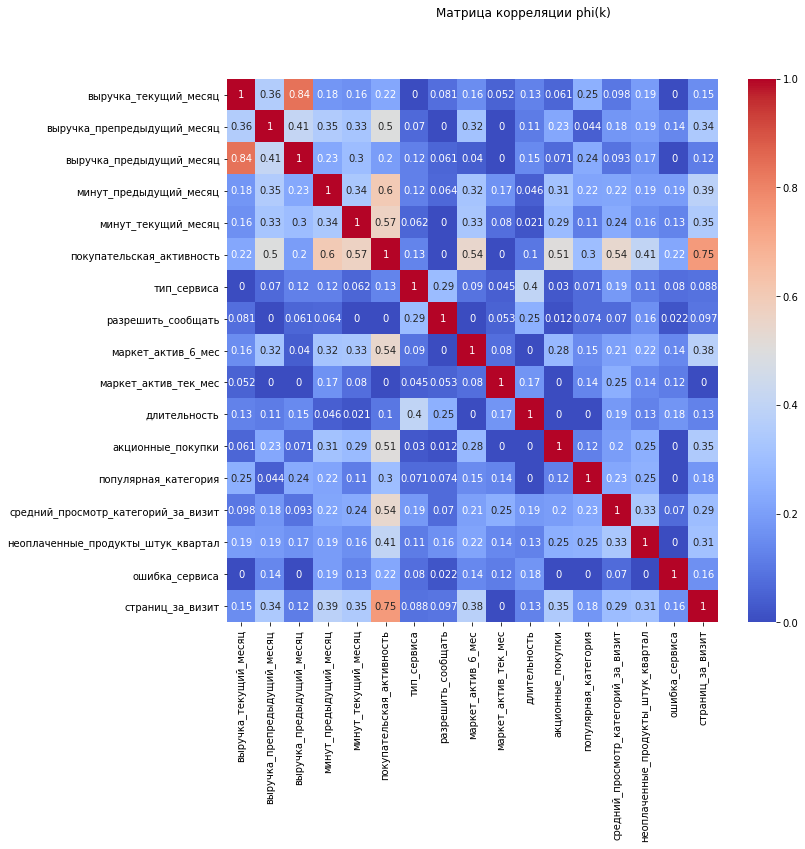

In [66]:
num_columns = ['–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü','–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü','–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å','–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏', '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å']
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ phi(k)')
sns.heatmap(data_market.phik_matrix(interval_cols=num_columns), annot=True, cmap='coolwarm');

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

–ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞, –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ –æ—Ç 0.9 –¥–æ 0.95 –Ω–µ—Ç.
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ - 0,88 - –º–µ–∂–¥—É –≤—ã—Ä—É—á–∫–æ–π –∑–∞ —Ç–µ–∫—É—â–∏–π –∏ –ø—Ä–µ–¥—ã–¥—â—É–∏–π –º–µ—Å—è—Ü, –∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ phi(k) –º–µ–∂–¥—É –Ω–∏–º–∏ 0,84.
–¢–∞–∫–∂–µ –ø–æ phi(k) –æ—Ç–º–µ—Ç–∏—Ç—å –º–æ–∂–Ω–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é 0,75 (–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å  –∏ —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç)

## –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–æ–≤

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –∏ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –°–¥–µ–ª–∞–µ–º —Å–ø–∏—Å–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∫–æ–≤ –¥–ª—è OHE –∏ ORD –∫–æ–¥–∏—Ä–æ–≤–∫–∏.  –°–¥–µ–ª–∞–µ–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ohe_columns: –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –ø—Ä–∏–º–µ–Ω–∏–º OHE-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (SimpleImputer –∏ OHE), –∞ —Ç–∞–∫–∂–µ–ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ord_columns: –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –ø—Ä–∏–º–µ–Ω–∏–º Ordinal-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
(SimpleImputer –∏ OE)

In [67]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X = data_market.drop(['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å'], axis=1)
y = data_market['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify = y)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

le = LabelEncoder()
le.fit_transform(y_train.unique())
print (le.classes_, le.transform(le.classes_))
y_train = le.transform(y_train)
y_test = le.transform(y_test)

(972, 16)

(324, 16)

(972,)

(324,)

['–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å' '–°–Ω–∏–∑–∏–ª–∞—Å—å'] [0 1]


<span style="color: blue; font-weight: bold">–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ : </span> ‚úîÔ∏è\
<span style="color: green"> üëç</span>

In [68]:
ohe_columns = ['–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']
ord_columns = ['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞', '—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å']
num_columns = ['–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü',       
               '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü',          
               '–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü',             
               '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü',            
               '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü',               
               '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å',                
               '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',                        
               '–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',                   
               '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
               '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',  
               '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞',                      
               '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç']
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['—Å—Ç–∞–Ω–¥–∞—Ä—Ç', '–ø—Ä–µ–º–∏—É–º'],
                    ['–¥–∞', '–Ω–µ—Ç'],
                    
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

–û–±—É—á–∏–º —á–µ—Ç—ã—Ä–µ –º–æ–¥–µ–ª–∏: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() –∏ SVC(). –í –∑–∞–¥–∞–Ω–∏–∏ –ø–æ–ø—Ä–æ—Å–∏–ª–∏ –≤—ã–±—Ä–∞—Ç—å –º–µ—Ç—Ä–∏–∫—É, —è –≤—ã–±—Ä–∞–ª–∞ ROC-AUC, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –±–æ–ª–µ–µ –æ–±–æ–±—â—ë–Ω–Ω–æ, –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç –ø–æ—Ä–æ–≥–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.–ö—Ä–∏–≤–∞—è ROC –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç —á–∞—Å—Ç–æ—Ç—É –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (TPR) –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —á–∞—Å—Ç–æ—Ç–æ–π –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (FPR) –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞ AUC –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–≤–æ–∫—É–ø–Ω—É—é –º–µ—Ä—É –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–º –ø–æ—Ä–æ–≥–∞–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

In [69]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 9),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },


    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)], 
        'models__C': [0.1, 1, 10], 
        'models__kernel': ['linear', 'rbf'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', randomized_search.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', randomized_search.best_score_)


y_test_pred_proba = randomized_search.predict_proba(X_test)


y_test_pred = y_test_pred_proba[:, 1]


print(f'–ú–µ—Ç—Ä–∏–∫–∞ ROC-AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {roc_auc_score(y_test, y_test_pred)}')

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']),
                                                 ('ord',
                                                  Pipeline(step

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ª—É—á—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –º–æ–¥–µ–ª–∏ –æ–∫–∞–∑–∞–ª–∞—Å—å SVC

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –°–¥–µ–ª–∞–ª–∏ –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ohe_columns: –ø—Ä–∏–º–µ–Ω–∏–ª–∏ OHE-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (SimpleImputer + OHE), –∞ —Ç–∞–∫–∂–µ–ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ord_columns: –ø—Ä–∏–º–µ–Ω–∏–ª–∏ Ordinal-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (SimpleImputer + OE)
–û–±—É—á–∏–ª–∏ —á–µ—Ç—ã—Ä–µ –º–æ–¥–µ–ª–∏: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() –∏ SVC().–ê –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã–±—Ä–∞–ª–∏ ROC-AUC, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –±–æ–ª–µ–µ –æ–±–æ–±—â—ë–Ω–Ω–æ, –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç –ø–æ—Ä–æ–≥–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.–ö—Ä–∏–≤–∞—è ROC –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç —á–∞—Å—Ç–æ—Ç—É –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (TPR) –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —á–∞—Å—Ç–æ—Ç–æ–π –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (FPR) –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞ AUC –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–≤–æ–∫—É–ø–Ω—É—é –º–µ—Ä—É –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–º –ø–æ—Ä–æ–≥–∞–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å SVC, –∑–Ω–∞—á–µ–Ω–∏–µ  ROC-AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ - 0,91


## –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [70]:
best_model = randomized_search.best_estimator_
data_preprocessor = best_model.named_steps['preprocessor']

pipeline_fin_version = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models',  SVC(C=10, probability=True, random_state=RANDOM_STATE))
]).fit(X_train, y_train)

X_train_trans = pd.DataFrame(data_preprocessor.transform(X_train), columns=data_preprocessor.get_feature_names_out())
X_test_trans = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())
explainer = shap.KernelExplainer(best_model.named_steps['models'].predict, shap.sample(X_train_trans, 100))
shap_values = explainer.shap_values(X_test_trans, nsamples=50)

  0%|          | 0/324 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.735e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.875e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.561e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.10

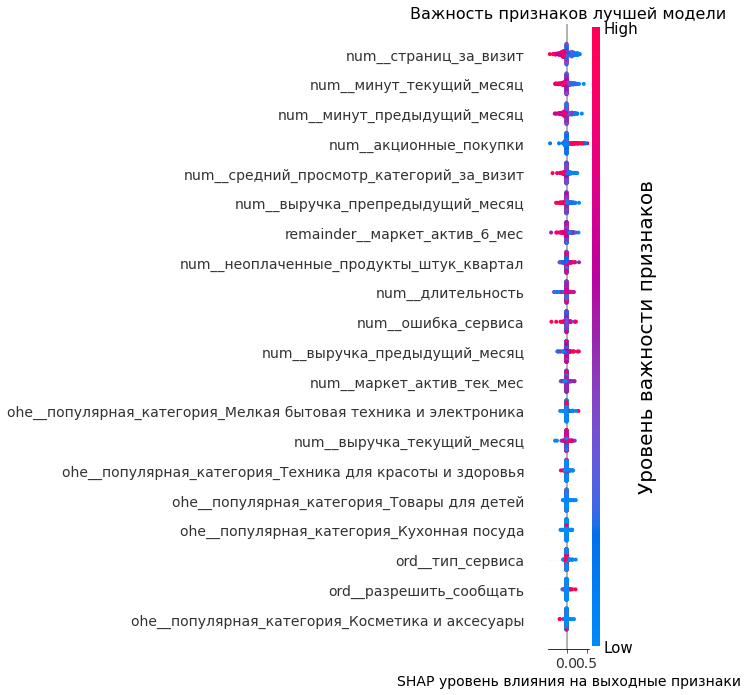

In [71]:
shap.initjs()
shap.summary_plot(shap_values, X_test_trans, show=False)

 
fig, ax = plt.gcf(), plt.gca()

 
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP —É—Ä–æ–≤–µ–Ω—å –≤–ª–∏—è–Ω–∏—è –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏", fontsize=14)
ax.set_title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏', fontsize=16)

 
cb_ax = fig.axes[1] 

 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("–£—Ä–æ–≤–µ–Ω—å –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤", fontsize=20)

plt.show()

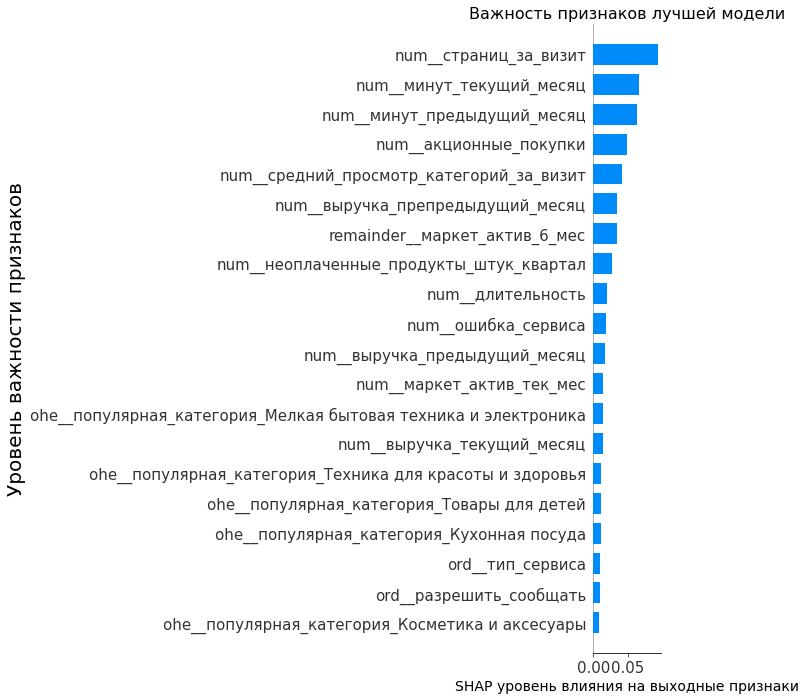

In [72]:
shap.initjs()
shap.summary_plot(shap_values, X_test_trans, plot_type='bar', show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP —É—Ä–æ–≤–µ–Ω—å –≤–ª–∏—è–Ω–∏—è –Ω–∞ –≤—ã—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏", fontsize=14)
ax.set_title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏', fontsize=16)
cb_ax = fig.axes[0] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("–£—Ä–æ–≤–µ–Ω—å –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤", fontsize=20)
plt.show();

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã

–ü–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ SHAP. –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –æ–ø–µ—Ä–µ–∂–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫ '–°—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç', –¥–∞–ª–µ–µ '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü' –∏ '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü'.–ï—Å–ª–∏ –∏—Ö –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å, –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç —Ö—É–∂–µ.

–ú–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - —ç—Ç–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—à–∏–±–∫–∞ —Å–µ—Ä–≤–∏—Å–∞, –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∑–∞ —Ç–µ–∫—É—â–∏–π –º–µ—Å—è—Ü –∏ —Ç–¥. 

## –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π

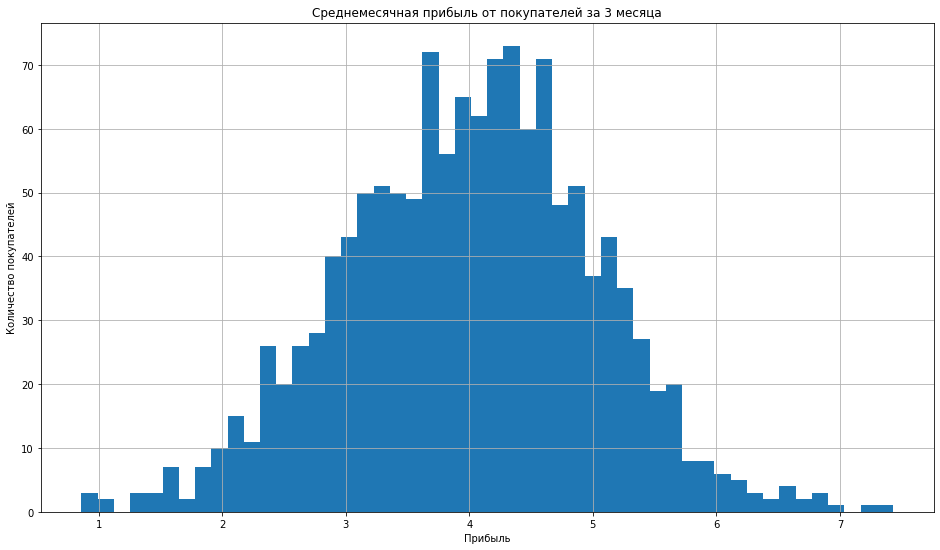

In [73]:
(money['–ø—Ä–∏–±—ã–ª—å']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –æ—Ç –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –∑–∞ 3 –º–µ—Å—è—Ü–∞')
plt.xlabel('–ü—Ä–∏–±—ã–ª—å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π')
plt.show()

In [74]:
std_income = np.std(money['–ø—Ä–∏–±—ã–ª—å'])
mediana_income = money['–ø—Ä–∏–±—ã–ª—å'].median()
print("–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ : ", std_income)
money['–ø—Ä–∏–±—ã–ª—å'].describe()

–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ :  1.0133321434255445


count   1,300.00
mean        4.00
std         1.01
min         0.86
25%         3.30
50%         4.04
75%         4.67
max         7.43
Name: –ø—Ä–∏–±—ã–ª—å, dtype: float64

–ú—ã –¥–æ–ª–∂–Ω—ã –Ω–∞–π—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö —Å–Ω–∏–∑–∏–ª–∞—Å—å –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ –ø—Ä–∏–¥—É–º–∞—Ç—å, –∫–∞–∫ –∏—Ö —É–¥–µ—Ä–∂–∞—Ç—å.

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Ç–∏–ø —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ø—Ä–∏–±—ã–ª–∏ - –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π.
–ó–Ω–∞—á–∏—Ç –º—ã –º–æ–∂–µ–º –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ä–∞–∑–±–∏–≤–∫–æ–π –Ω–∞ –∫–≤–∞–Ω—Ç–∏–ª–∏, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Ç—Ä–∏ –≤—ã–±–æ—Ä–∫–∏: –º–∞–ª–µ–Ω—å–∫–∏–π –¥–æ—Ö–æ–¥ (–¥–æ 0,25 –∫–≤–∞–Ω—Ç–∏–ª—è), –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π (–º–µ–∂–¥—É 0,25 –∏ 0,75) –∏ –±–æ–ª—å—à–æ–π (–ø–æ—Å–ª–µ 0,75). –†–∞—Å–ø—Ä–µ–¥–µ–ª–∏–º —ç—Ç–æ –∏ –≤–ø–∏—à–µ–º –≤ –¥–∞—Ç–∞—Å–µ—Ç, –∞ –∑–∞—Ç–µ–º —Å–æ–ª—å–µ–º —Ç–∞–±–ª–∏—Ü—ã. 
 
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ —Å–Ω–∏–∂–µ–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ —É—Å—Ç–∞–Ω–æ–≤–∏–º –ø–æ—Ä–æ–≥. –ü–æ—Å–ª–µ —á–µ–≥–æ —Å—Ä–∞–≤–Ω–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –≥—Ä—É–ø–ø  

In [75]:
def predictions_func(X, threshold):
    n = pipeline_fin_version.predict_proba(X) 
    return (n[:, 1] > threshold).astype(int)

In [76]:
prediction_version = predictions_func(X, threshold=0.5)
X['predictions'] = prediction_version
X['probs'] = pipeline_fin_version.predict_proba(X)[:,1]

In [77]:
money['–æ—Ü–µ–Ω–∫–∞_–ø—Ä–∏–±—ã–ª–∏'] = money['–ø—Ä–∏–±—ã–ª—å'].apply(lambda x: '–º–∞–ª–µ–Ω—å–∫–∞—è' if x < (mediana_income - std_income) 
                                                       else ('–±–æ–ª—å—à–∞—è' if x > (mediana_income + std_income) 
                                                       else '–Ω–æ—Ä–º–∞–ª—å–Ω–∞—è'))

In [78]:
X = X.reset_index()
X = pd.merge(X, money, on='id', sort=True)
X.head()

id  –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü  –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  \
0  215349               5,216.00                     4,472.00   
1  215350               5,457.50                     4,826.00   
2  215351               6,158.00                     4,793.00   
3  215352               5,807.50                     4,594.00   
4  215353               4,738.50                     5,124.00   

   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü  –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü  \
0                  4,971.60                      12                   10   
1                  5,058.40                       8                   13   
2                  6,610.40                      11                   13   
3                  5,872.50                       8                   11   
4                  5,388.50                      10                   10   

  —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  \
0     –ø—Ä–µ–º–∏—É–º                 –¥–∞                4.40                     4   
1    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                4.90                     3   
2    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                3.20                     5   
3    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                5.10                     3   
4    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                3.30                     4   

   ...  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  \
0  ...               0.75      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
1  ...               0.14     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
2  ...               0.99      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
3  ...               0.94      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
4  ...               0.26     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   

  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  \
0                                   4                                   4   
1                                   5                                   2   
2                                   5                                   0   
3                                   3                                   2   
4                                   4                                   1   

   –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  predictions  probs  –ø—Ä–∏–±—ã–ª—å  \
0               2                 5            1   0.96     4.16   
1               1                 5            1   0.71     3.13   
2               6                 4            1   0.92     4.87   
3               3                 2            1   0.98     4.21   
4               1                 4            1   0.80     3.95   

   –æ—Ü–µ–Ω–∫–∞_–ø—Ä–∏–±—ã–ª–∏  
0      –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è  
1      –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è  
2      –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è  
3      –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è  
4      –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è  

[5 rows x 21 columns]

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   –≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                1296 non-null   float64
 2   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü          1296 non-null   float64
 3   –≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü             1296 non-null   float64
 4   –º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü               1296 non-null   int64  
 5   –º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü                  1296 non-null   int64  
 6   —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞                          1296 non-null   object 
 7   —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å                   1296 non-null   object 
 8   –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å                   1296 non-null   float64
 9   –º–∞—Ä–∫–µ—Ç_–∞–∫—

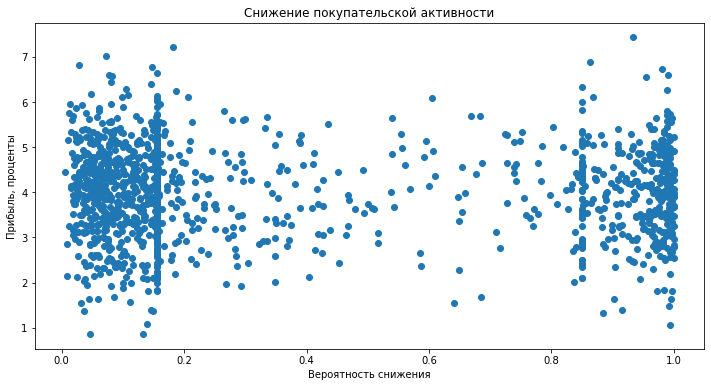

In [80]:
plt.figure(figsize=[12, 6])
plt.scatter(X.probs, X.–ø—Ä–∏–±—ã–ª—å);
plt.title('–°–Ω–∏–∂–µ–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
plt.xlabel('–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–Ω–∏–∂–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–∏–±—ã–ª—å, –ø—Ä–æ—Ü–µ–Ω—Ç—ã')
plt.show()

–ì—Ä–∞—Ñ–∏–∫ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –ø—Ä–æ–≤–∞–ª –ø–æ—Å–µ—Ä–µ–¥–∏–Ω–µ. –ü–æ—Ä–æ–≥ —É—Å—Ç–∞–Ω–æ–≤–∏–º —Å 0,7. 
–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –º–∞–ª–µ–Ω—å–∫–æ–π –ø—Ä–∏–±—ã–ª—å—é –∏ –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é—é —Å–Ω–∏–∂–µ–Ω–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏

In [81]:
X['—Å–Ω–∏–∂–µ–Ω–∏–µ'] = X['probs'].apply(lambda x: '–°–Ω–∏–∑–∏–ª–∞—Å—å' if x > 0.7 else '–ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å') 

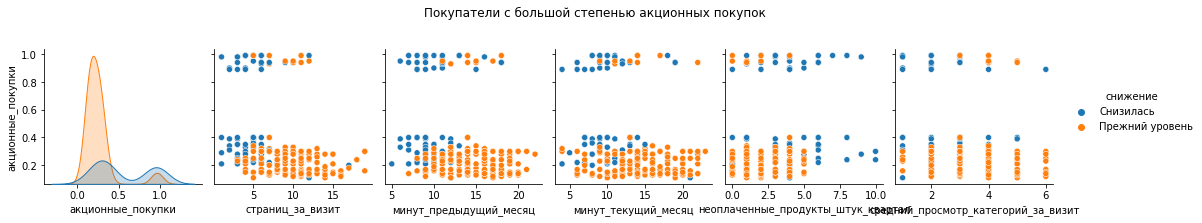

In [82]:
x=['–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
   '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç',
   '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü',
   '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü',
   '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
   '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç']

y=['–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏']

g = sns.pairplot(X.query('–æ—Ü–µ–Ω–∫–∞_–ø—Ä–∏–±—ã–ª–∏ == "–º–∞–ª–µ–Ω—å–∫–∞—è"'), hue='—Å–Ω–∏–∂–µ–Ω–∏–µ', x_vars=x, y_vars=y)
g.fig.suptitle('–ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —Å –±–æ–ª—å—à–æ–π —Å—Ç–µ–ø–µ–Ω—å—é –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫', y=1.2, fontsize=12)
plt.show()


–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –Ω–∞ —Å–µ–≥–º–µ–Ω—Ç –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –æ—Å—Ç–∞–≤—à–∏–º–∏—Å—è —Ç–æ–≤–∞—Ä–∞–º–∏ –≤ –∫–æ—Ä–∑–∏–Ω–µ

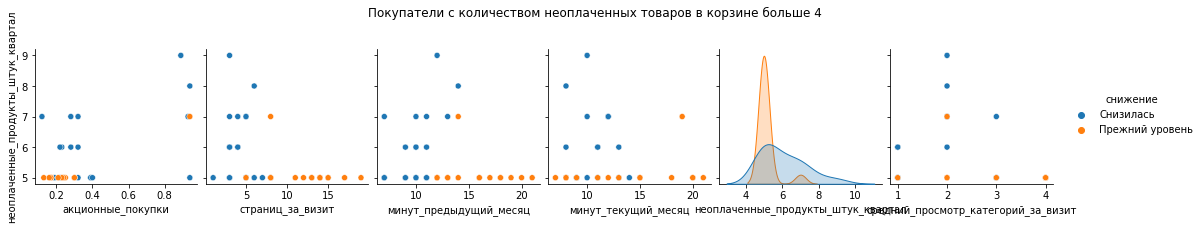

In [83]:
x=['–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
   '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç',
   '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü',
   '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü',
   '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
   '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç']

y=['–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª']

g = sns.pairplot(X.query('–æ—Ü–µ–Ω–∫–∞_–ø—Ä–∏–±—ã–ª–∏ == "–±–æ–ª—å—à–∞—è" & –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª > 4'), hue='—Å–Ω–∏–∂–µ–Ω–∏–µ', x_vars=x, y_vars=y)
g.fig.suptitle("–ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –≤ –∫–æ—Ä–∑–∏–Ω–µ –±–æ–ª—å—à–µ 4", y=1.2, fontsize=12)
plt.show()

###### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã

–°–Ω–∏–∂–µ–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∑–∞–º–µ—Ç–Ω–æ –∫–∞–∫ –≤ –≥—Ä—É–ø–ø–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫—É–ø–∞—é—Ç –º–∞–ª–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, —Ç–∞–∫ –∏ –≤ –≥—Ä—É–ø–ø–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –ø—Ä–∏–±—ã–ª—å–Ω–æ—Å—Ç—å—é –∏ –±–æ–ª–µ–µ 4 –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –≤ –∫–æ—Ä–∑–∏–Ω–µ.

* –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫—É–ø–∞—é—Ç –º–∞–ª–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤: —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç—ã –Ω–µ –≤–æ—à–ª–∏ –≤ —á–∏—Å–ª–æ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö, –≤–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–∏ –Ω–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ—Å–≤–µ–¥–æ–º–ª–µ–Ω—ã –æ–± –∞–∫—Ü–∏—è—Ö –∏–ª–∏ –∏—Ö –Ω–∏—á–µ–≥–æ –Ω–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–ª–æ. –ü–æ –∏–¥–µ–µ –æ–Ω–∏ –¥–æ–ª–∂–Ω—ã –¥–µ–ª–∞—Ç—å –±–æ–ª—å—à–µ 3 –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫

–ó–¥–µ—Å—å –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å—É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—Å—Å—ã–ª–æ–∫ —Å –∞–∫—Ü–∏—è–º–∏ —Ç–∞–∫–∏–º –∫–ª–∏–µ–Ω—Ç–∞–º, –∞–∫—Ç–∏–≤–Ω–µ–µ —É–≤–µ–¥–æ–º–ª—è—Ç—å –∏—Ö –æ–± –∞–∫—Ü–∏—è—Ö —Å –ø–æ–º–æ—â—å—é –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤. –¢–∞–∫–∂–µ –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å –ø–æ–ª—å–æ–≤–∞—Ç–µ–ª—è —Å–∞–π—Ç–æ–º, –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–µ —Å–Ω–∏–∂–∞–µ—Ç—Å—è (–ø—Ä–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ –±–æ–ª–µ–µ 6 —Å—Ç—Ä –∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–∏ –Ω–∞ —Å–∞–π—Ç–µ –±–æ–ª–µ–µ 10 –º–∏–Ω—É—Ç)


* –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –ø—Ä–∏–±—ã–ª—å—é –∏ –±–æ–ª–µ–µ 4 –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –≤ –∫–æ—Ä–∑–∏–Ω–µ: –≤–æ–∑–º–æ–∂–Ω–æ, –∫–ª–∏–µ–Ω—Ç—ã –æ—Ç–≤–ª–µ–∫–∞—é—Ç—Å—è –∏ –∑–∞–±—ã–≤–∞—é—Ç, —á—Ç–æ —É –Ω–∏—Ö –≤ –∫–æ—Ä–∑–∏–Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è —Ç–æ–≤–∞—Ä, –∞ –≤–æ–∑–º–æ–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç –µ–≥–æ —Å–µ–±–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –æ–∂–∏–¥–∞—è –ø–æ–Ω–∏–∂–µ–Ω–∏—è –Ω–∞ –Ω–µ–≥–æ —Ü–µ–Ω—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä. –ú–æ–∂–Ω–æ –ø—Ä–∏—Å—ã–ª–∞—Ç—å –∏–º –Ω–∞–ø–æ–º–∏–Ω–∞–ª–∫–∏ –æ –∑–∞–±—ã—Ç—ã—Ö –≤ –∫–æ—Ä–∑–∏–Ω–µ –≤–µ—â–∞—Ö –∏ –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ —Å–∫–∏–¥–∫–∏. –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –≤—Å–µ–≥–æ –±—É–¥–µ—Ç —Ç–æ–∂–µ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –∏—Ö –Ω–∞ —Å–∞–π—Ç, —Ç–∞–∫ –∫–∞–∫ –≤—Å–µ –≤—ã—à–µ—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –ø—Ä–æ –¥—Ä—É–≥—É—é –≥—Ä—É–ø–ø—É –∞–∫—Ç—É–∞–ª—å–Ω–æ –∏ –∑–¥–µ—Å—å

## –í—ã–≤–æ–¥—ã

#### –¶–µ–ª—å: —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–∑–≤–æ–ª–∏—Ç –ø–µ—Ä—Å–æ–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º –∫–ª–∏–µ–Ω—Ç–∞–º, —á—Ç–æ–±—ã —É–≤–µ–ª–∏—á–∏—Ç—å –∏—Ö –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.
###### –î–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è —Ü–µ–ª–∏ –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ —Å–ª–µ–¥—É—é—â–∞—è —Ä–∞–±–æ—Ç–∞: 

–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö: –ó–∞–≥—Ä—É–∑–∏–ª–∏ –∏ –ø–µ—Ä–≤–∏—á–Ω–æ –æ—Å–º–æ—Ç—Ä–µ–ª–∏ –¥–∞—Ç–∞—Å–µ—Ç—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—Å–º–æ—Ç—Ä–∞: 
* –ü—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã
* –Ø–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_money –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ 5, –æ–Ω–∏ –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã.
* –°–¥–µ–ª–∞–ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤: –Ω–∞–∑–≤–∞–Ω–∏—è –ø–µ—Ä–µ–≤–µ–¥–µ–Ω—ã –≤ —Å—Ç—Ä–æ—á–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç, –ø—Ä–æ–±–µ–ª—ã –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_file –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω–∏–∂–Ω–µ–µ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏–µ.
* –ë—ã–ª–∏ –Ω–∞–π–¥–µ–Ω—ã —Ç–∞–∫–∂–µ –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_file, –æ–Ω–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã
* –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∞ –æ–ø–µ—á–∞—Ç–∫–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ market_time



–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ:
* –î–∞–Ω–Ω—ã–µ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
* –í –¥–∞–Ω–Ω—ã—Ö –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã, –∏—Ö –º–æ–∂–Ω–æ —Å–≤—è–∑–∞—Ç—å –∫–∞–∫ —Å –≤–æ–∑–º–æ–∂–Ω—ã–º–∏ –æ—à–∏–±–∫–∞–º–∏, —Ç–∞–∫ –∏ —Å —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é –ø—Ä–æ–¥–∞–∂ –∏–ª–∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–º —Ñ–∞–∫—Ç–æ—Ä–æ–º (–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤).
* –ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏–∑–Ω–∞–∫ –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ—Ö–æ–∂ –Ω–∞ –±–∏–º–æ–¥–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —É—á–∏—Ç—ã–≤–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —Ñ–∞–∫—Ç–æ—Ä–∞
* –í market_money —É–±—Ä–∞–ª–∏ –∞–Ω–æ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–æ–π –∏–ª–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é –ø–æ–∫—É–ø–∫–∏ (–æ–ø—Ç –∏–ª–∏ –¥—Ä—É–≥–æ–µ). –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –≥—Ä–∞—Ñ–∏–∫ –≤—ã—Ä—É—á–∫–∏ –≤—ã–≥–ª—è–¥–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ.
* –°–∞–º–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 6 –º–µ—Å—è—Ü–µ–≤ - –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π, –¥–∞–ª–µ–µ –∏–¥–µ—Ç –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å –∏ –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã. –°–∞–º–∞—è –Ω–µ–ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è - –ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞.
* 74% –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–≥–ª–∞—Å–∏–ª–∏—Å—å –Ω–∞ —Ä–µ–∫–ª–∞–º–Ω—É—é —Ä–∞—Å—Å—ã–ª–∫—É
* 71% –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–º–µ—é—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —Ç–∏–ø —Å–µ—Ä–≤–∏—Å–∞
* 62% —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å–Ω—É—é –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å
* –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∑–∞–¥–∞–Ω–∏–µ–º –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–ª–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–ª–∞–ª–∏ –ø–æ–∫—É–ø–∫–∏ –≤—Å–µ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞
* —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö id –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ 1297, —Ç–æ –µ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –¥–∞–µ—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ id –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –ø–æ–∫—É–ø–∫–∞–º –∑–∞ —Ç—Ä–∏ –º–µ—Å—è—Ü–∞
* –î–∞—Ç–∞—Å–µ—Ç money —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ–± —É—Å–ª–æ–≤–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è—Ö –ø—Ä–∏–±—ã–ª–∏ —Å –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã, –Ω–µ—Ç –≤—ã–±—Ä–æ—Å–æ–≤, –Ω–µ—Ç –∞–Ω–æ–º–∞–ª–∏–π.

–ó–∞—Ç–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –æ–±—ä–µ–¥–∏–Ω–∏–ª–∏ –≤ –æ–¥–∏–Ω - data_market

* –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ –≤—ã—Ä—É—á–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ market_money —Å–¥–µ–ª–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã: '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü', '–≤—ã—Ä—É—á–∫–∞_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü'
* –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ –º–∏–Ω—É—Ç –¥–∞—Ç–∞—Å–µ—Ç–∞ market_time  —Å–¥–µ–ª–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã: '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü', '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü'

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è

* –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞, –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ –æ—Ç 0.9 –¥–æ 0.95 –Ω–µ—Ç. 
* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ - 0,88 - –º–µ–∂–¥—É –≤—ã—Ä—É—á–∫–æ–π –∑–∞ —Ç–µ–∫—É—â–∏–π –∏ –ø—Ä–µ–¥—ã–¥—â—É–∏–π –º–µ—Å—è—Ü
* –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø–æ phi(k) –º–µ–∂–¥—É –Ω–∏–º–∏ 0,84.
* –¢–∞–∫–∂–µ –ø–æ phi(k) –æ—Ç–º–µ—Ç–∏—Ç—å –º–æ–∂–Ω–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é 0,75 (–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç)


–ü–∞–π–ø–ª–∞–π–Ω—ã

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –°–¥–µ–ª–∞–ª–∏ –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ohe_columns: –ø—Ä–∏–º–µ–Ω–∏–ª–∏ OHE-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (SimpleImputer + OHE), –∞ —Ç–∞–∫–∂–µ–ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ ord_columns: –ø—Ä–∏–º–µ–Ω–∏–ª–∏ Ordinal-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (SimpleImputer + OE) –û–±—É—á–∏–ª–∏ —á–µ—Ç—ã—Ä–µ –º–æ–¥–µ–ª–∏: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() –∏ SVC().–ê –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã–±—Ä–∞–ª–∏ ROC-AUC, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –±–æ–ª–µ–µ –æ–±–æ–±—â—ë–Ω–Ω–æ, –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ –æ—Ç –ø–æ—Ä–æ–≥–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.–ö—Ä–∏–≤–∞—è ROC –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç —á–∞—Å—Ç–æ—Ç—É –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (TPR) –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —á–∞—Å—Ç–æ—Ç–æ–π –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (FPR) –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞ AUC –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–≤–æ–∫—É–ø–Ω—É—é –º–µ—Ä—É –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–º –ø–æ—Ä–æ–≥–∞–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

* –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –æ–∫–∞–∑–∞–ª–∞—Å—å SVC, –∑–Ω–∞—á–µ–Ω–∏–µ ROC-AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ - 0,91 

–ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ SHAP. –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –æ–ø–µ—Ä–µ–∂–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫ '–°—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç', –¥–∞–ª–µ–µ '–º–∏–Ω—É—Ç_–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü' –∏ '–º–∏–Ω—É—Ç_—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü'.–ï—Å–ª–∏ –∏—Ö –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å, –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –±—É–¥–µ—Ç —Ö—É–∂–µ.

–ú–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ - —ç—Ç–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—à–∏–±–∫–∞ —Å–µ—Ä–≤–∏—Å–∞, –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∑–∞ —Ç–µ–∫—É—â–∏–π –º–µ—Å—è—Ü


–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è



–°–Ω–∏–∂–µ–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∑–∞–º–µ—Ç–Ω–æ –∫–∞–∫ –≤ –≥—Ä—É–ø–ø–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫—É–ø–∞—é—Ç –º–∞–ª–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, —Ç–∞–∫ –∏ –≤ –≥—Ä—É–ø–ø–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –ø—Ä–∏–±—ã–ª—å–Ω–æ—Å—Ç—å—é –∏ –±–æ–ª–µ–µ 4 –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –≤ –∫–æ—Ä–∑–∏–Ω–µ.

* –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫—É–ø–∞—é—Ç –º–∞–ª–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤: —ç—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç—ã –Ω–µ –≤–æ—à–ª–∏ –≤ —á–∏—Å–ª–æ –ø–æ—Å—Ç–æ—è–Ω–Ω—ã—Ö, –≤–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–∏ –Ω–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ—Å–≤–µ–¥–æ–º–ª–µ–Ω—ã –æ–± –∞–∫—Ü–∏—è—Ö –∏–ª–∏ –∏—Ö –Ω–∏—á–µ–≥–æ –Ω–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–ª–æ.

–ó–¥–µ—Å—å –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å—É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—Å—Å—ã–ª–æ–∫ —Å –∞–∫—Ü–∏—è–º–∏ —Ç–∞–∫–∏–º –∫–ª–∏–µ–Ω—Ç–∞–º, –∞–∫—Ç–∏–≤–Ω–µ–µ —É–≤–µ–¥–æ–º–ª—è—Ç—å –∏—Ö –æ–± –∞–∫—Ü–∏—è—Ö —Å –ø–æ–º–æ—â—å—é –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤. –¢–∞–∫–∂–µ –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å –ø–æ–ª—å–æ–≤–∞—Ç–µ–ª—è —Å–∞–π—Ç–æ–º, –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–µ —Å–Ω–∏–∂–∞–µ—Ç—Å—è (–ø—Ä–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ –±–æ–ª–µ–µ 6 —Å—Ç—Ä –∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–∏ –Ω–∞ —Å–∞–π—Ç–µ –±–æ–ª–µ–µ 10 –º–∏–Ω—É—Ç)


* –ì—Ä—É–ø–ø–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –ø—Ä–∏–±—ã–ª—å—é –∏ –±–æ–ª–µ–µ 4 –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –≤ –∫–æ—Ä–∑–∏–Ω–µ: –≤–æ–∑–º–æ–∂–Ω–æ, –∫–ª–∏–µ–Ω—Ç—ã –æ—Ç–≤–ª–µ–∫–∞—é—Ç—Å—è –∏ –∑–∞–±—ã–≤–∞—é—Ç, —á—Ç–æ —É –Ω–∏—Ö –≤ –∫–æ—Ä–∑–∏–Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è —Ç–æ–≤–∞—Ä, –∞ –≤–æ–∑–º–æ–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—é—Ç –µ–≥–æ —Å–µ–±–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –æ–∂–∏–¥–∞—è –ø–æ–Ω–∏–∂–µ–Ω–∏—è –Ω–∞ –Ω–µ–≥–æ —Ü–µ–Ω—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä. –ú–æ–∂–Ω–æ –ø—Ä–∏—Å—ã–ª–∞—Ç—å –∏–º –Ω–∞–ø–æ–º–∏–Ω–∞–ª–∫–∏ –æ –∑–∞–±—ã—Ç—ã—Ö –≤ –∫–æ—Ä–∑–∏–Ω–µ –≤–µ—â–∞—Ö –∏ –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ —Å–∫–∏–¥–∫–∏. –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –≤—Å–µ–≥–æ –±—É–¥–µ—Ç —Ç–æ–∂–µ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –∏—Ö –Ω–∞ —Å–∞–π—Ç, —Ç–∞–∫ –∫–∞–∫ –≤—Å–µ –≤—ã—à–µ—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –ø—Ä–æ –¥—Ä—É–≥—É—é –≥—Ä—É–ø–ø—É –∞–∫—Ç—É–∞–ª—å–Ω–æ –∏ –∑–¥–µ—Å—å